<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Lógica Difusa en Visión por Computador</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Prof. Daniel Vargas Medina</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: davargasme@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRONICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="fig/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>14 de junio de 2022</p>

# Source code for skfuzzy.filters.fire

<h2>fire2d</h2>

* 2-D filtering using Fuzzy Inference Ruled by Else-action (FIRE)
* FIRE filtering is nonlinear, and is specifically designed to remove impulse (salt and pepper) noise.

* http://pythonhosted.org/scikit-fuzzy/api/skfuzzy.filters.html

* Fabrizio Russo, Fuzzy Filtering of Noisy Sensor Data, IEEE Instrumentation and Measurement Technology Conference, Brussels, Belgium, June 4 - 6, 1996, pp 1281 - 1285.

<h3>Función</h3>
* http://pythonhosted.org/scikit-fuzzy/_modules/skfuzzy/filters/fire.html

<h1>skfuzzy.fire2d(im, l1=0, l2=255, fuzzyresolution=1)</h1>


<h2>Parameters:	</h2>
* I : 2d array
    * Input image.

* l1 : float
    *Lower limit of filtering range.

* l2 : float
    * Upper limit of filtering range.

* fuzzyresolution : float, default = 1

        *Resolution of fuzzy input sequence, or spacing between [-l2+1, l2-1]. The default assumes an integer input; for floating point images a decimal value should be used approximately equal to the bit depth.

<h2>Returns:</h2>	
* J : 2d array
    * FIRE filtered image.

<h2>Notes</h2>

Filtering occurs for $l1 < |x| < l2$; outside this range the data is unaffected.

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

import cv2
%matplotlib inline



<h3>noisy</h3>

* The Function adds gaussian , salt-pepper , poisson and speckle noise in an image

* image : ndarray
    * Input image data. Will be converted to float.
* mode : str
    * One of the following strings, selecting the type of noise to add:

    * 'gauss'     Gaussian-distributed additive noise.
    * 'poisson'   Poisson-distributed noise generated from the data.
    * 's&p'       Replaces random pixels with 0 or 1.
    * 'speckle'   Multiplicative noise using out = image $+ n*$image, where $n$ is uniform noise with specified mean and variance.

* http://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

In [3]:
import os

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy


In [4]:
def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

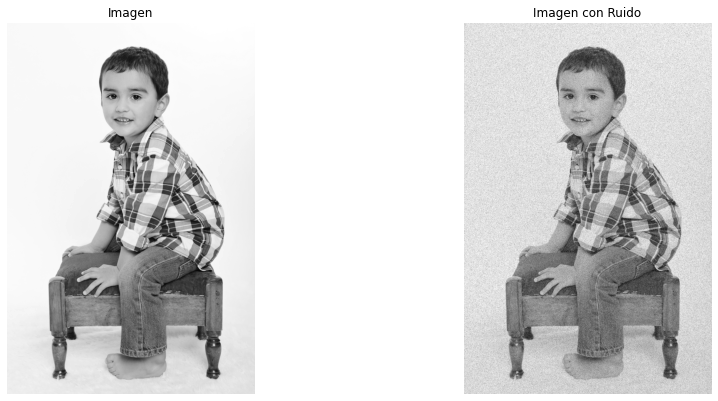

In [5]:
img = cv2.imread('fig/Notebook/Emmanuel.jpg',1)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#
noise_img = sp_noise(img1,0.2)
#noise_img = noisy("s&p",img)
#img2 = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)

plt.figure(1,figsize=(15,15))
plt.subplot(221), plt.imshow(img1, cmap='gray'), plt.title('Imagen'), plt.axis("off")
plt.subplot(222), plt.imshow(noise_img, cmap='gray'), plt.title('Imagen con Ruido'), plt.axis("off")
plt.show()


In [9]:
#FILTRO DIFUSO: fire2d

# IMPLEMENTAR AQUÍ EL FILTRO DIFUSO FIRE2D

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Fuzzy c-means clustering</h1>

* http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html

<h2>Instalar scikit-fuzzy</h2>

* Pre-built installation
* http://pythonhosted.org/scikit-fuzzy/install.html
* Ejecutar: <b>easy_install -U scikit-fuzzy</b>


# Fuzzy c-means clustering

* http://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html

* Fuzzy logic principles can be used to cluster multidimensional data, assigning each point a membership in each cluster center from 0 to 100 percent.
* This can be very powerful compared to traditional hard-thresholded clustering where every point is assigned a crisp, exact label.

* Fuzzy c-means clustering is accomplished via skfuzzy.cmeans, and the output from this function can be repurposed to classify new data according to the calculated clusters (also known as prediction) via skfuzzy.cmeans_predict


# Data generation and setup

* In this example we will first undertake necessary imports, then define some test data to work with.

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

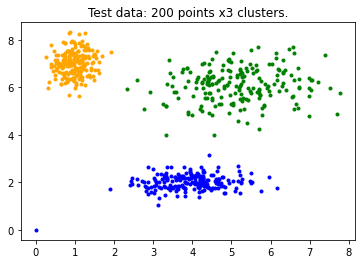

In [10]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

%matplotlib inline



colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# Clustering

* Above is our test data. 
    * We see three distinct blobs. 
    * However, what would happen if we didn’t know how many clusters we should expect? 
    * Perhaps if the data were not so clearly clustered?

* Let’s try clustering our data several times, with between 2 and 9 clusters.

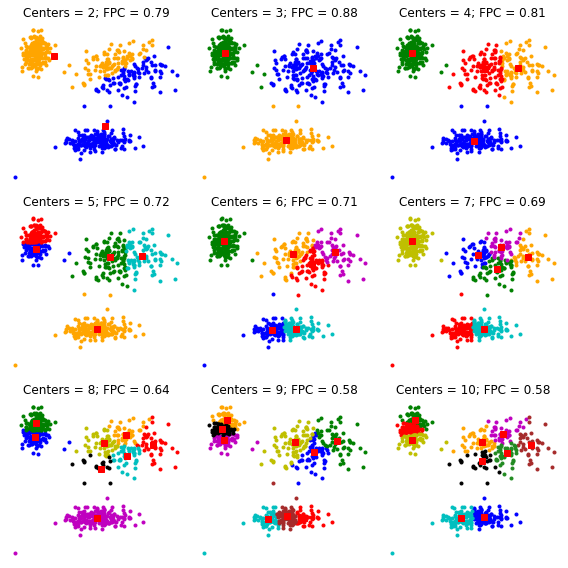

In [11]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

# The fuzzy partition coefficient (FPC)
* The FPC is defined on the range from 0 to 1, with 1 being best. 
* It is a metric which tells us how cleanly our data is described by a certain model. 
* Next we will cluster our set of data - which we know has three clusters - several times, with between 2 and 9 clusters. 
* We will then show the results of the clustering, and plot the fuzzy partition coefficient. When the FPC is maximized, our data is described best.


* As we can see, the ideal number of centers is 3. 
* This isn’t news for our contrived example, but having the FPC available can be very useful when the structure of your data is unclear.

* Note that we started with two centers, not one; clustering a dataset with only one cluster center is the trivial solution and will by definition return FPC == 1.



Text(0, 0.5, 'Fuzzy partition coefficient')

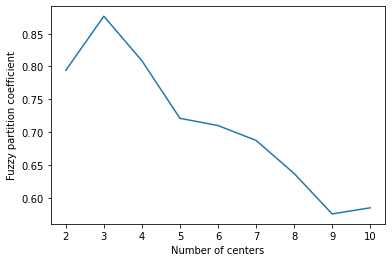

In [12]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

# Classifying New Data
* Now that we can cluster data, the next step is often fitting new points into an existing model. This is known as prediction. 
* It requires both an existing model and new data to be classified.

<h3>Building the model</h3>
* We know our best model has three cluster centers. 
* We’ll rebuild a 3-cluster model for use in prediction, generate new uniform data, and predict which cluster to which each new data point belongs.

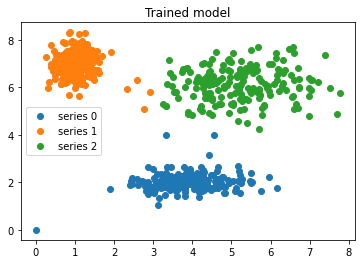

In [13]:
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

# Prediction
* Finally, we generate uniformly sampled data over this field and classify it via cmeans_predict, incorporating it into the pre-existing model.

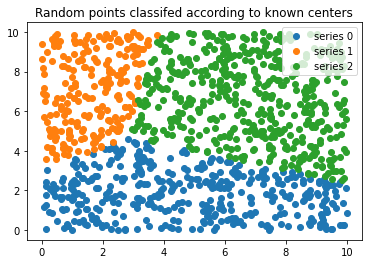

In [14]:
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()

plt.show()